---
title: "HW-2: Tabular RL"
subtitle: "A DSAN 6650 Homework"
authors: ["Kangheng Liu", "Billy McGloin"]
date: last-modified
date-format: long
format:
    html:
        theme:
            light: 
                - cosmo
                - style/html-sta313.scss
            dark:
                - cosmo
                - style/html-sta313.scss
                - style/html-dark.scss
                - style/my-adjustments.scss
        toc: true
        code-copy: true
        code-overflow: wrap
        mainfont: "Atkinson Hyperlegible"
        code-annotations: hover
        self-contained: true
execute:
    echo: true
    warning: false
    message: false
    freeze: auto
filters:
    - openlinksinnewpage
lightbox: auto
---

<div style="margin-top: 20px; text-align: center;">
  <a href="https://github.com/kanghengliu/Tabula" target="_blank" style="font-size: 16px; font-weight: bold;">
    View this project on GitHub
  </a>
</div>

# Introduction

We created a python package named `tabula` that implements three games (Environments) with three traditional reinforcement learning algorithms.

In [1]:
import argparse
import pygame
import sys
import os
from IPython.display import display, Image
from tabula.environments import *  
from tabula.solvers import *  
from tabula.utils import Utils

pygame 2.6.1 (SDL 2.28.4, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Environments & Solvers


Here we created a function to train and visualize a policy given an environment and a solver. The function passes in assorted arguments, such as the number of episodes, max steps per episode, and the output filepaths. As verbose is set to True, for each environment-solver pair, assorted metrics are printed, the convergence plot is displayed, we render the optimal policy, and a gif is displayed showing the optimal policy in action.

<!-- ::: {.callout-note}
GIFs are not displayed in the HTML output, but they are saved in the output folder which can be viewed in the GitHub repository.
::: -->

In [2]:
# set parameters (same for all solvers and envs)
verbose = True
save_metrics = True

# function to train and visualize policy for a given environment and solver
def train_and_visualize_policy(env, solver, episodes, max_steps, verbose, save_metrics, gif_filename, image_filename, convergence_plot_filename):
    # train agent
    policy = solver.train(max_steps=max_steps, episodes=episodes, verbose=verbose)

    # print policy
    print("\nOptimal Policy:")
    print(policy)

    # render optimal policy
    Utils.render_optimal_policy(
        env, policy, save_image=save_metrics, image_filename=image_filename
    )

    # run optimal policy
    Utils.run_optimal_policy(
        env, policy, save_gif=save_metrics, gif_filename=gif_filename
    )

    # plot convergence plot
    Utils.plot_convergence(solver.mean_reward, file_path=convergence_plot_filename)


## Boat Environment

In [3]:
# set environment
env = BoatEnv()

### Dynamic Programming

In [4]:
# define output paths
image_filename = os.path.join("./outputs", "optim_policy_boat_dp.png")
gif_filename = os.path.join("./outputs", "gameplay_boat_dp.gif")
convergence_plot_filename = os.path.join("./outputs", "convergence_plot_boat_dp.png")

Running simulation for 500 episodes...
Episode 1/500
Episode 51/500
Episode 101/500
Episode 151/500
Episode 201/500
Episode 251/500
Episode 301/500
Episode 351/500
Episode 401/500
Episode 451/500
Simulation complete.

Average reward during random simulation: 83.28
Transition Model (p(s', r | s, a)):
State 0, Action 0:
    Next State: 0, Reward: 0, Probability: 0.698
    Next State: 0, Reward: 1, Probability: 0.302
Transition Model (p(s', r | s, a)):
State 0, Action 0:
    Next State: 0, Reward: 0, Probability: 0.698
    Next State: 0, Reward: 1, Probability: 0.302
State 0, Action 1:
    Next State: 0, Reward: 1, Probability: 0.295
    Next State: 1, Reward: 2, Probability: 0.705
Transition Model (p(s', r | s, a)):
State 0, Action 0:
    Next State: 0, Reward: 0, Probability: 0.698
    Next State: 0, Reward: 1, Probability: 0.302
State 0, Action 1:
    Next State: 0, Reward: 1, Probability: 0.295
    Next State: 1, Reward: 2, Probability: 0.705
State 1, Action 0:
    Next State: 1, Rewa

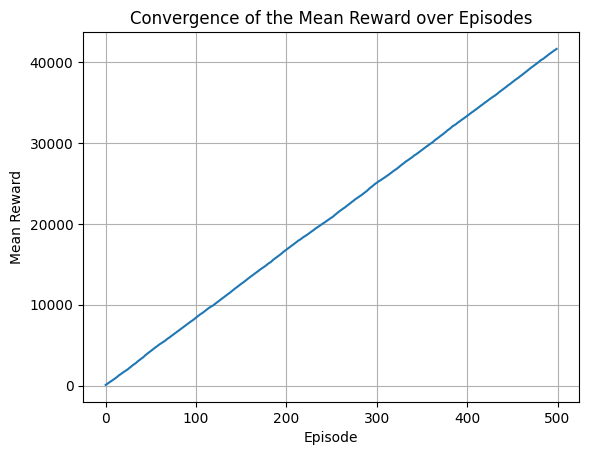

In [5]:
# initialize solver
solver = DynamicProgramming(env)

# set parameters
episodes = 500
max_steps = 50

train_and_visualize_policy(env, solver, episodes, max_steps, verbose, save_metrics, gif_filename, image_filename, convergence_plot_filename)

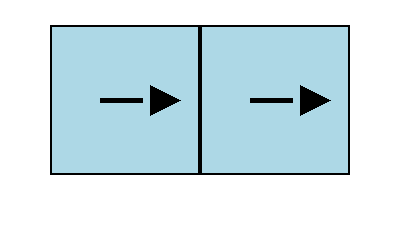

In [6]:
# optimal policy
display(Image(filename=image_filename))

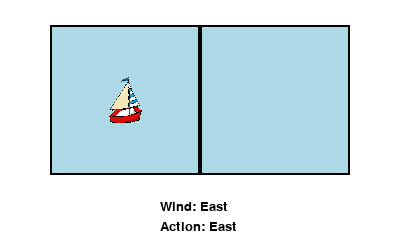

In [7]:
# gameplay showing optimal policy
display(Image(filename=gif_filename))

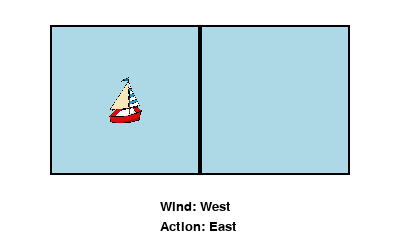

### Monte Carlo

In [4]:
# define output paths
image_filename = os.path.join("./outputs", "optim_policy_boat_mc.png")
gif_filename = os.path.join("./outputs", "gameplay_boat_mc.gif")
convergence_plot_filename = os.path.join("./outputs", "convergence_plot_boat_mc.png")

Starting Monte Carlo ES training for 100 episodes...
Episode 10/100 - Average Return: 108.90, Average Q-Value Update: 12.5477
Episode 20/100 - Average Return: 156.90, Average Q-Value Update: 2.8513
Episode 30/100 - Average Return: 154.60, Average Q-Value Update: 1.4027
Episode 40/100 - Average Return: 154.90, Average Q-Value Update: 1.0536
Episode 50/100 - Average Return: 155.70, Average Q-Value Update: 0.4959
Episode 60/100 - Average Return: 156.50, Average Q-Value Update: 0.4762
Episode 70/100 - Average Return: 152.60, Average Q-Value Update: 1.0448
Episode 80/100 - Average Return: 153.80, Average Q-Value Update: 0.3804
Episode 90/100 - Average Return: 158.10, Average Q-Value Update: 0.3425
Episode 100/100 - Average Return: 155.00, Average Q-Value Update: 0.2713

Action distribution across episodes: {0: '0.081', 1: '0.919'}
Final Average Return: 150.70
Final Average Q-Value Update: 2.0866
Final Action Values (Q):
 [[ 73.375      134.41791045]
 [ 98.68817204 152.13265306]]

Optimal Po

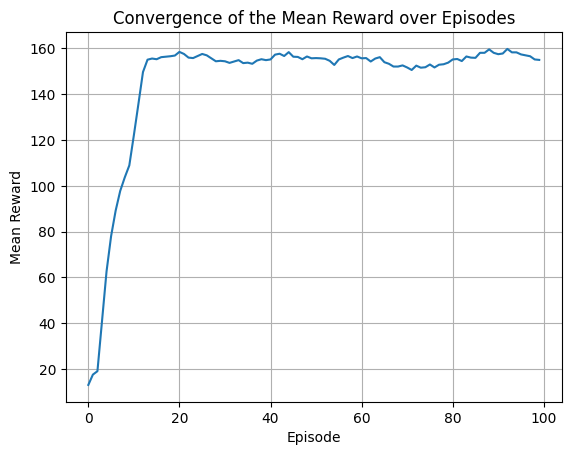

In [5]:
# initialize solver
solver = MonteCarlo(env)

# set parameters
episodes = 100
max_steps = 50

train_and_visualize_policy(env, solver, episodes, max_steps, verbose, save_metrics, gif_filename, image_filename, convergence_plot_filename)

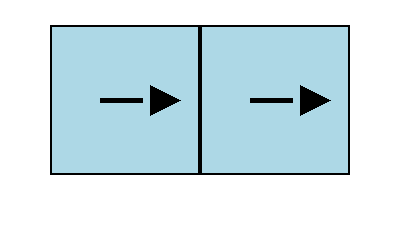

In [6]:
# optimal policy
display(Image(filename=image_filename))

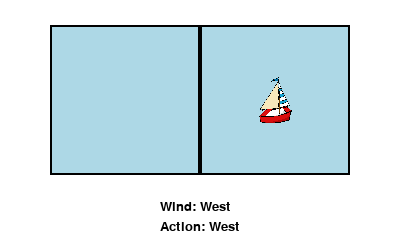

In [7]:
# gameplay showing optimal policy
display(Image(filename=gif_filename))

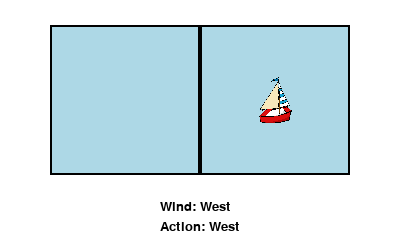

### Temporal Difference

In [12]:
# define output paths
image_filename = os.path.join("./outputs", "optim_policy_boat_td.png")
gif_filename = os.path.join("./outputs", "gameplay_boat_td.gif")
convergence_plot_filename = os.path.join("./outputs", "convergence_plot_boat_td.png")

Training Temporal Difference algorithm for 250 episodes...
Episode 1/250 - Average Return: 8.00, Average Q-Value Update: 0.0329
Episode 26/250 - Average Return: 69.04, Average Q-Value Update: 0.1394
Episode 51/250 - Average Return: 78.08, Average Q-Value Update: 0.0502
Episode 76/250 - Average Return: 76.32, Average Q-Value Update: 0.0598
Episode 101/250 - Average Return: 77.28, Average Q-Value Update: 0.0504
Episode 126/250 - Average Return: 77.92, Average Q-Value Update: 0.0564
Episode 151/250 - Average Return: 74.88, Average Q-Value Update: 0.0268
Episode 176/250 - Average Return: 77.32, Average Q-Value Update: 0.0537
Episode 201/250 - Average Return: 75.48, Average Q-Value Update: 0.0742
Episode 226/250 - Average Return: 76.60, Average Q-Value Update: 0.0855
Training complete! Action distribution across episodes: [0.06656 0.93344]
Final Action Values (Q):
 [[16.77819255 29.04173809]
 [27.88650034 31.35323269]]

Optimal Policy:
[[0. 1.]
 [0. 1.]]
Optimal policy visualization saved a

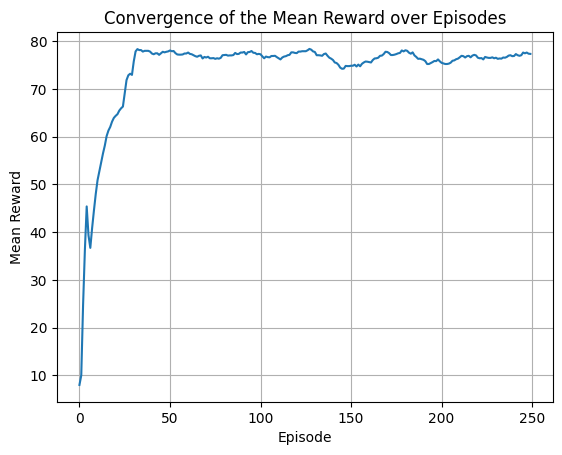

In [13]:
# initialize solver
solver = TemporalDifference(env)

# set parameters
episodes = 250
max_steps = 25

train_and_visualize_policy(env, solver, episodes, max_steps, verbose, save_metrics, gif_filename, image_filename, convergence_plot_filename)

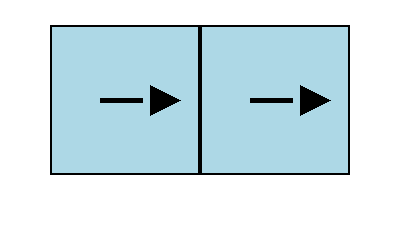

In [14]:
# optimal policy
display(Image(filename=image_filename))

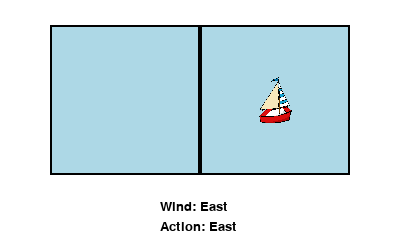

In [15]:
# gameplay showing optimal policy
display(Image(filename=gif_filename))

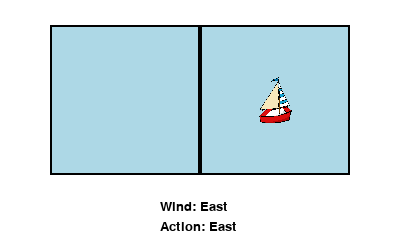

## Grid World Environment

In [8]:
# set environment
env = GridWorldEnv()

### Dynamic Programming

In [17]:
# define output paths
image_filename = os.path.join("./outputs", "optim_policy_gridworld_dp.png")
gif_filename = os.path.join("./outputs", "gameplay_gridworld_dp.gif")
convergence_plot_filename = os.path.join("./outputs", "convergence_plot_gridwordl_dp.png")

In [ ]:
# initialize solver
solver = DynamicProgramming(env)

# set parameters
episodes = 5000
max_steps = 50

train_and_visualize_policy(env, solver, episodes, max_steps, verbose, save_metrics, gif_filename, image_filename, convergence_plot_filename)

::: {.callout-note}
The output from the above cell was removed to maintain brevity and avoid rendering issues.
:::

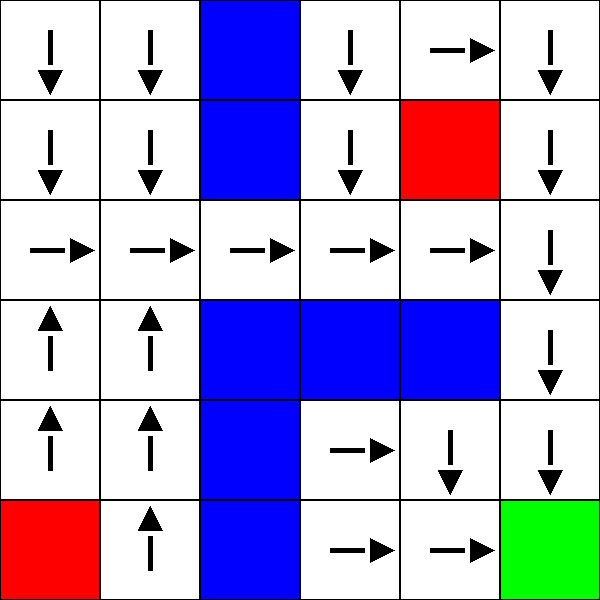

In [19]:
# optimal policy
display(Image(filename=image_filename))

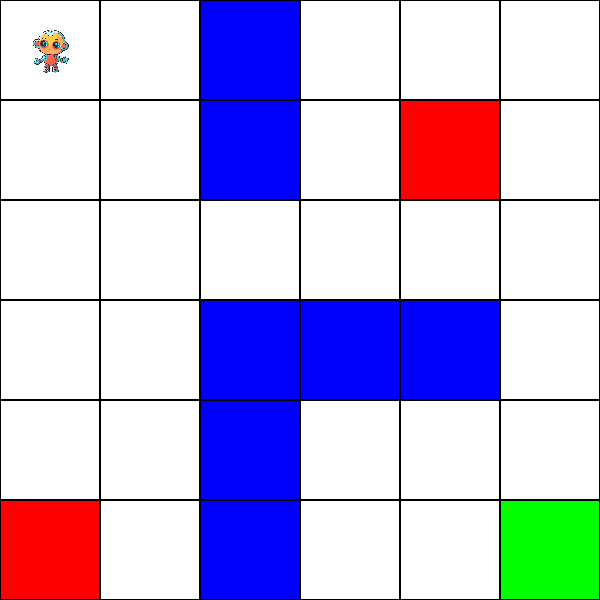

In [20]:
# gameplay showing optimal policy
display(Image(filename=gif_filename))

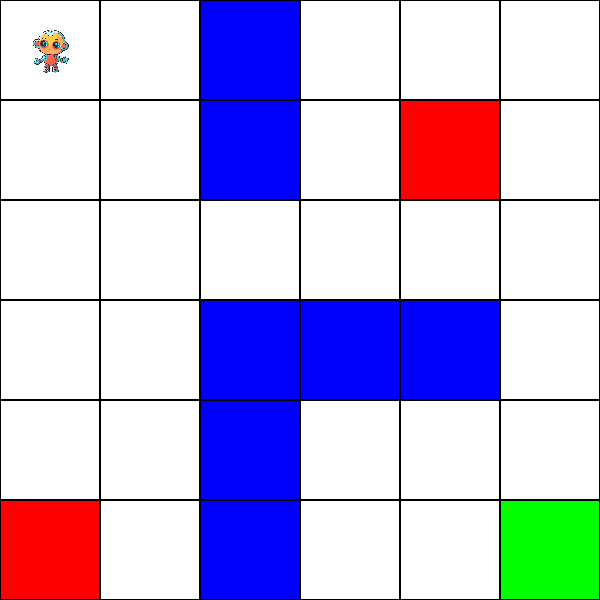

### Monte Carlo

In [9]:
# define output paths
image_filename = os.path.join("./outputs", "optim_policy_gridworld_mc.png")
gif_filename = os.path.join("./outputs", "gameplay_gridworld_mc.gif")
convergence_plot_filename = os.path.join("./outputs", "convergence_plot_gridworld_mc.png")

Starting Monte Carlo ES training for 20000 episodes...
Episode 2000/20000 - Average Return: 48.34, Average Q-Value Update: 0.6868
Episode 4000/20000 - Average Return: 63.64, Average Q-Value Update: 0.0921
Episode 6000/20000 - Average Return: 65.19, Average Q-Value Update: 0.0493
Episode 8000/20000 - Average Return: 66.54, Average Q-Value Update: 0.0479
Episode 10000/20000 - Average Return: 65.71, Average Q-Value Update: 0.0292
Episode 12000/20000 - Average Return: 65.60, Average Q-Value Update: 0.0223
Episode 14000/20000 - Average Return: 66.22, Average Q-Value Update: 0.0205
Episode 16000/20000 - Average Return: 65.98, Average Q-Value Update: 0.0164
Episode 18000/20000 - Average Return: 63.51, Average Q-Value Update: 0.0135
Episode 20000/20000 - Average Return: 65.55, Average Q-Value Update: 0.0130

Action distribution across episodes: {0: '0.064', 1: '0.402', 2: '0.040', 3: '0.494'}
Final Average Return: 63.63
Final Average Q-Value Update: 0.0991
Final Action Values (Q):
 [[ 49.72759

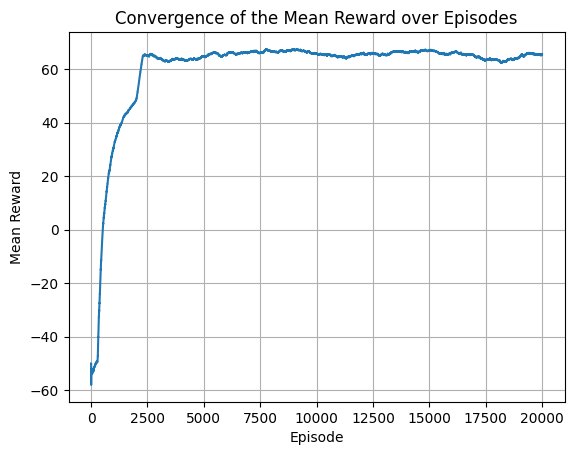

In [10]:
# initialize solver
solver = MonteCarlo(env)

# set parameters
episodes = 20000
max_steps = 50

train_and_visualize_policy(env, solver, episodes, max_steps, verbose, save_metrics, gif_filename, image_filename, convergence_plot_filename)

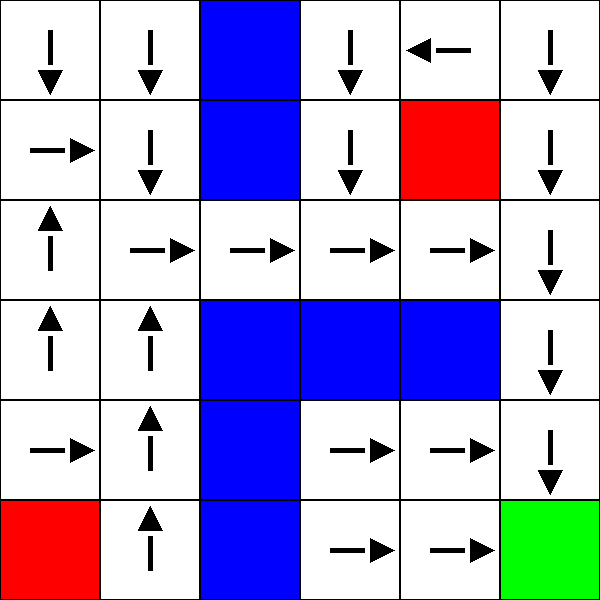

In [11]:
# optimal policy
display(Image(filename=image_filename))

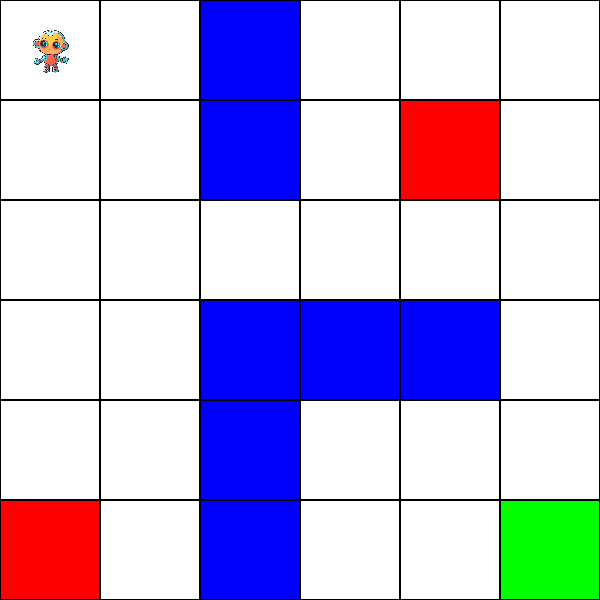

In [12]:
# gameplay showing optimal policy
display(Image(filename=gif_filename))

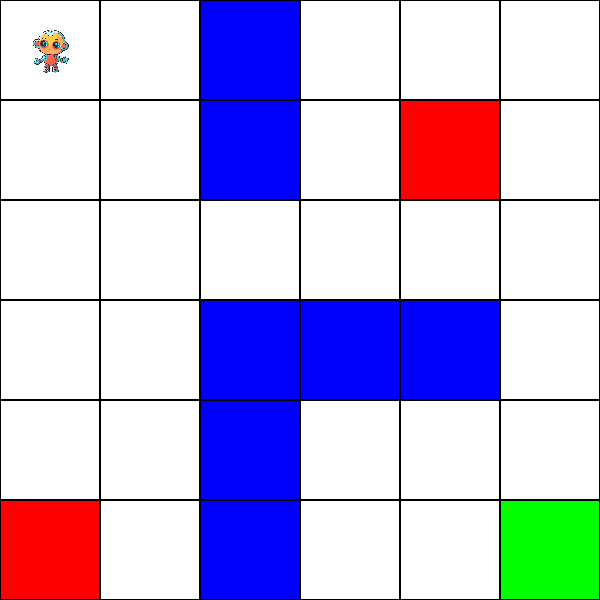

### Temporal Difference

In [13]:
# define output paths
image_filename = os.path.join("./outputs", "optim_policy_gridworld_td.png")
gif_filename = os.path.join("./outputs", "gameplay_gridworld_td.gif")
convergence_plot_filename = os.path.join("./outputs", "convergence_plot_gridworld_td.png")

Training Temporal Difference algorithm for 5000 episodes...
Episode 1/5000 - Average Return: -50.00, Average Q-Value Update: 0.0978
Episode 501/5000 - Average Return: 31.36, Average Q-Value Update: 0.8395
Episode 1001/5000 - Average Return: 66.72, Average Q-Value Update: 1.1583
Episode 1501/5000 - Average Return: 69.30, Average Q-Value Update: 0.5732
Episode 2001/5000 - Average Return: 66.96, Average Q-Value Update: 1.1327
Episode 2501/5000 - Average Return: 67.03, Average Q-Value Update: 1.1048
Episode 3001/5000 - Average Return: 69.84, Average Q-Value Update: 0.9666
Episode 3501/5000 - Average Return: 67.60, Average Q-Value Update: 0.4022
Episode 4001/5000 - Average Return: 70.12, Average Q-Value Update: 0.4230
Episode 4501/5000 - Average Return: 63.74, Average Q-Value Update: 0.6936
Training complete! Action distribution across episodes: [0.05683993 0.43818418 0.04423435 0.46074153]
Final Action Values (Q):
 [[  8.72341648   9.68369613   8.79054668   9.40910806]
 [ 10.63886285  12.7

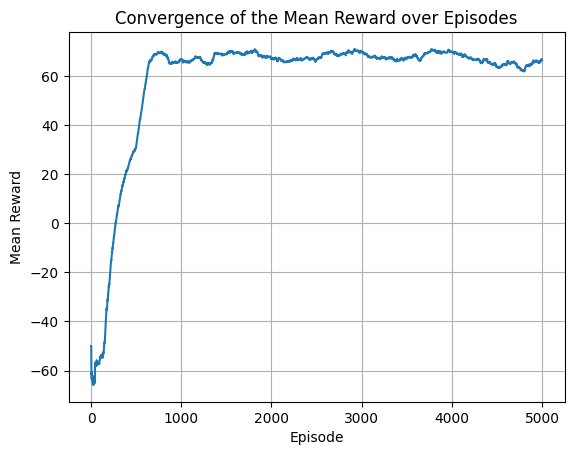

In [14]:
# initialize solver
solver = TemporalDifference(env)

# set parameters
episodes = 5000
max_steps = 50

# train agent
train_and_visualize_policy(env, solver, episodes, max_steps, verbose, save_metrics, gif_filename, image_filename, convergence_plot_filename)

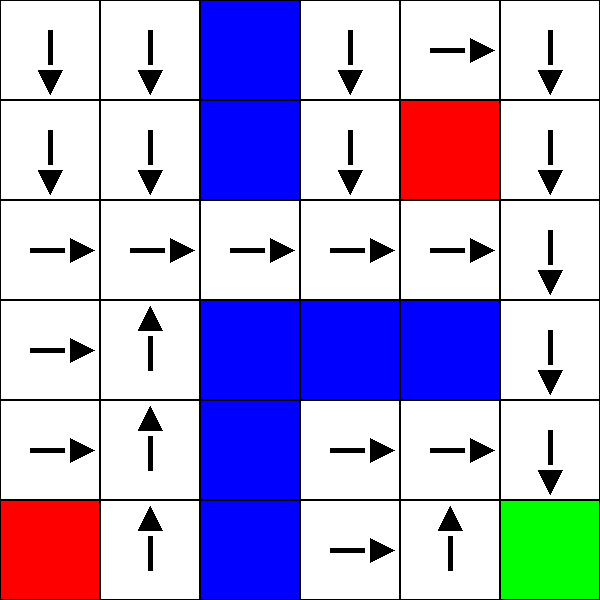

In [15]:
# optimal policy
display(Image(filename=image_filename))

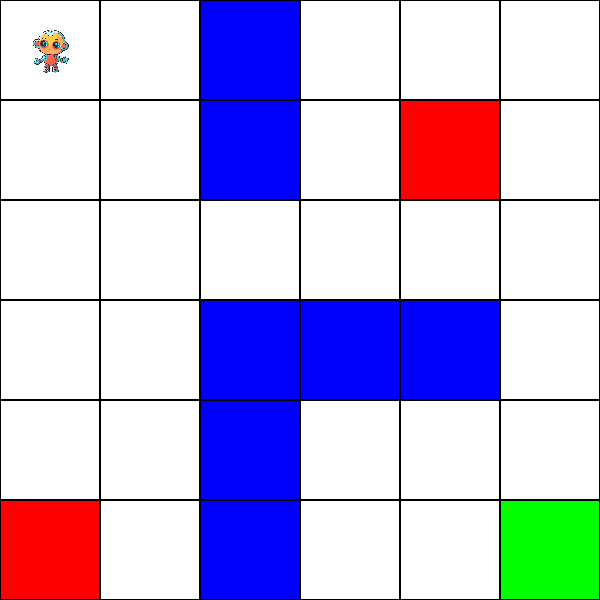

In [16]:
# gameplay showing optimal policy
display(Image(filename=gif_filename))

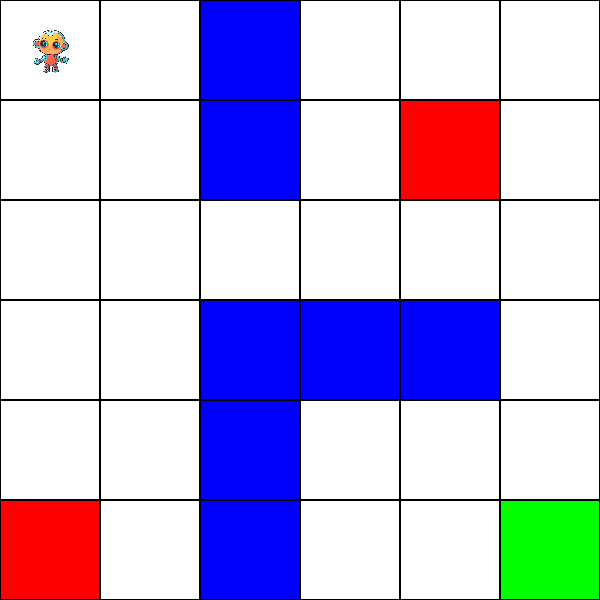

## Geosearch Environment

In [22]:
# set environment
env = GeosearchEnv()

### Dynamic Programming

In [30]:
# define output paths
image_filename = os.path.join("./outputs", "optim_policy_geosearch_dp.png")
gif_filename = os.path.join("./outputs", "gameplay_geosearch_dp.gif")
convergence_plot_filename = os.path.join("./outputs", "convergence_plot_geosearch_dp.png")

In [ ]:
# initialize solver
solver = DynamicProgramming(env)

# set parameters
episodes = 1000
max_steps = 25

train_and_visualize_policy(env, solver, episodes, max_steps, verbose, save_metrics, gif_filename, image_filename, convergence_plot_filename)

::: {.callout-note}
The output from the above cell was removed to maintain brevity and avoid rendering issues.
:::

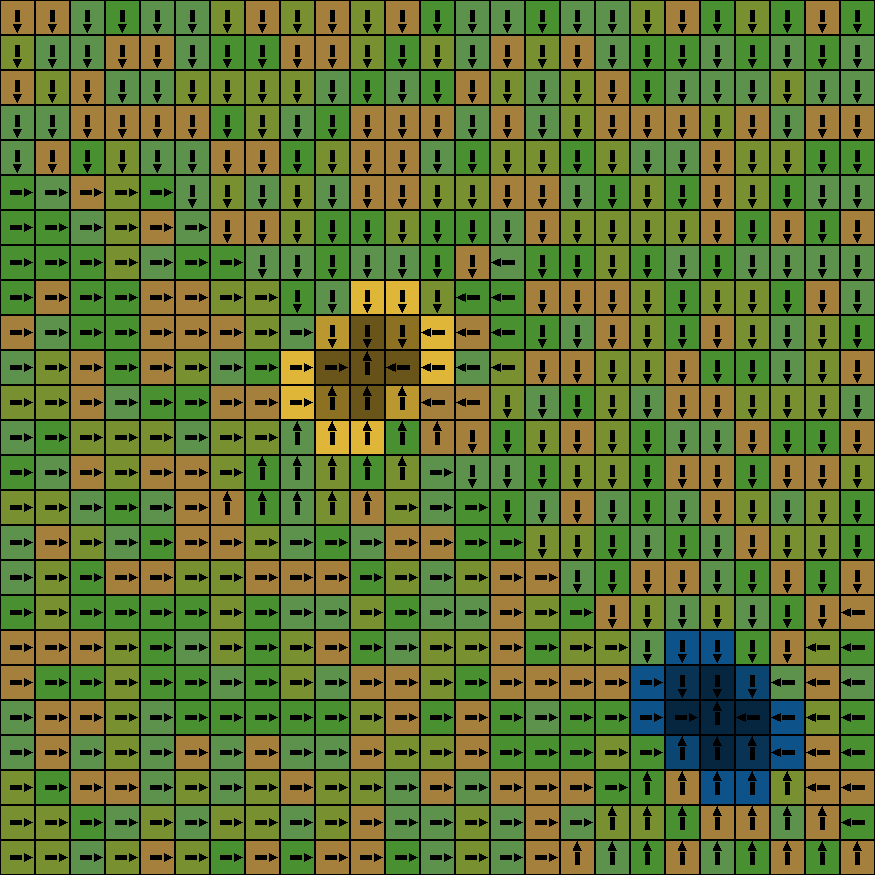

In [32]:
# optimal policy
display(Image(filename=image_filename))

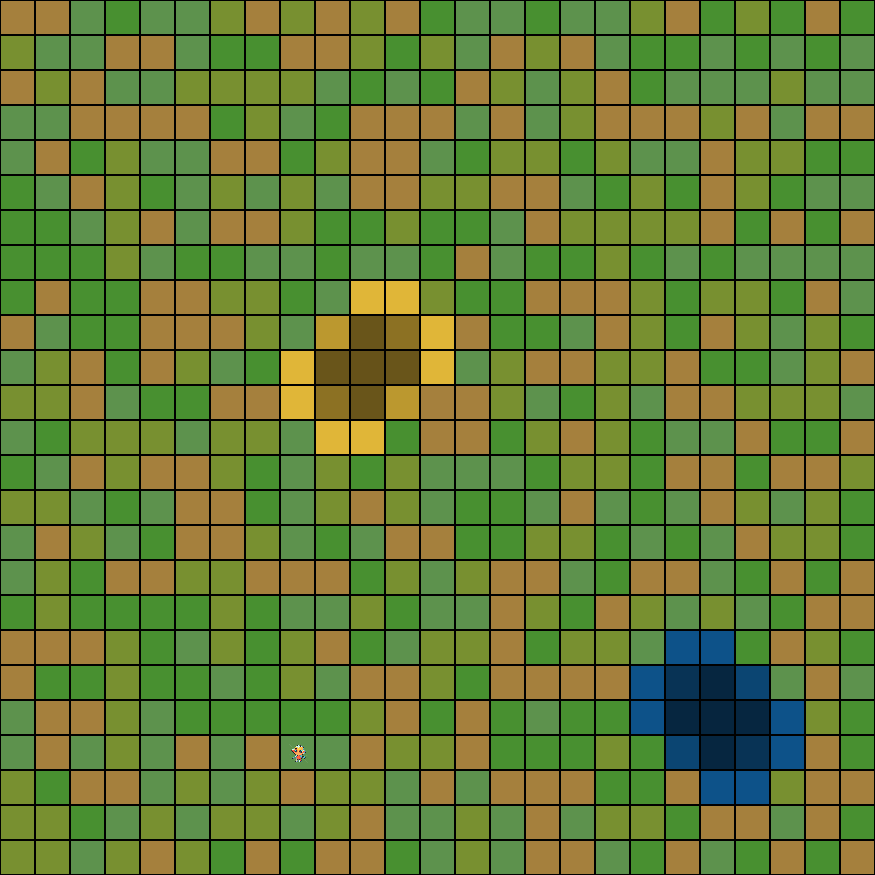

In [33]:
# gameplay showing optimal policy
display(Image(filename=gif_filename))

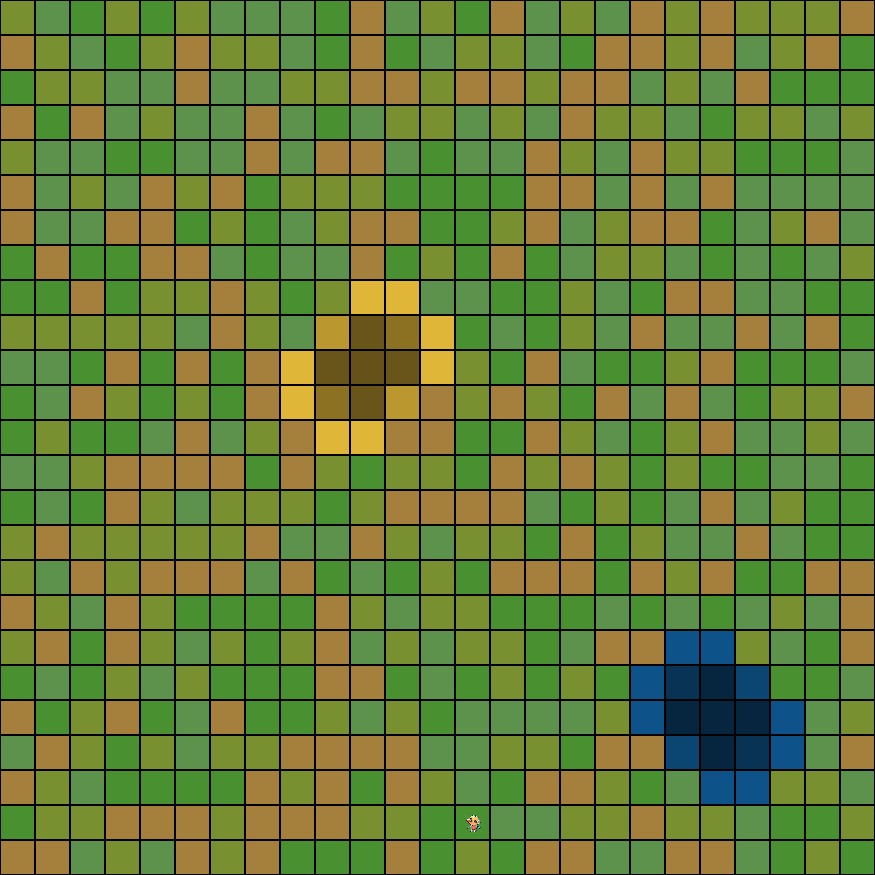

### Monte Carlo

In [23]:
# define output paths
image_filename = os.path.join("./outputs", "optim_policy_geosearch_mc.png")
gif_filename = os.path.join("./outputs", "gameplay_geosearch_mc.gif")
convergence_plot_filename = os.path.join("./outputs", "convergence_plot_geosearch_mc.png")

Starting Monte Carlo ES training for 5000 episodes...
Episode 500/5000 - Average Return: 0.21, Average Q-Value Update: 0.0178
Episode 1000/5000 - Average Return: 0.61, Average Q-Value Update: 0.0337
Episode 1500/5000 - Average Return: 0.74, Average Q-Value Update: 0.0257
Episode 2000/5000 - Average Return: 0.90, Average Q-Value Update: 0.0211
Episode 2500/5000 - Average Return: 0.83, Average Q-Value Update: 0.0111
Episode 3000/5000 - Average Return: 0.93, Average Q-Value Update: 0.0149
Episode 3500/5000 - Average Return: 0.93, Average Q-Value Update: 0.0134
Episode 4000/5000 - Average Return: 0.97, Average Q-Value Update: 0.0095
Episode 4500/5000 - Average Return: 1.09, Average Q-Value Update: 0.0119
Episode 5000/5000 - Average Return: 1.07, Average Q-Value Update: 0.0074

Action distribution across episodes: {0: '0.385', 1: '0.334', 2: '0.142', 3: '0.139'}
Final Average Return: 0.83
Final Average Q-Value Update: 0.0167
Final Action Values (Q):
 [[4.91973701e-44 4.29988245e-15 9.858614

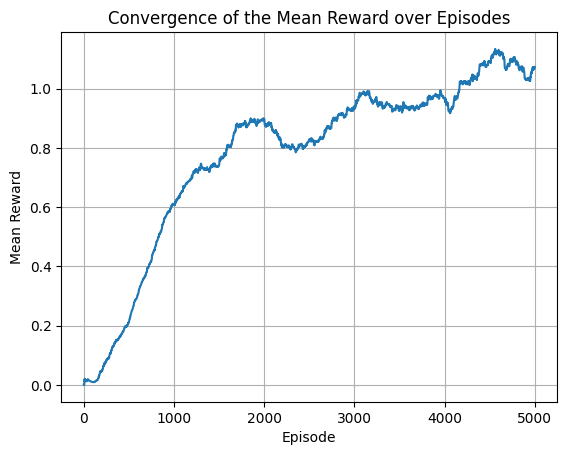

In [24]:
# initialize solver
solver = MonteCarlo(env)

# set parameters
episodes = 5000
max_steps = 50

train_and_visualize_policy(env, solver, episodes, max_steps, verbose, save_metrics, gif_filename, image_filename, convergence_plot_filename)

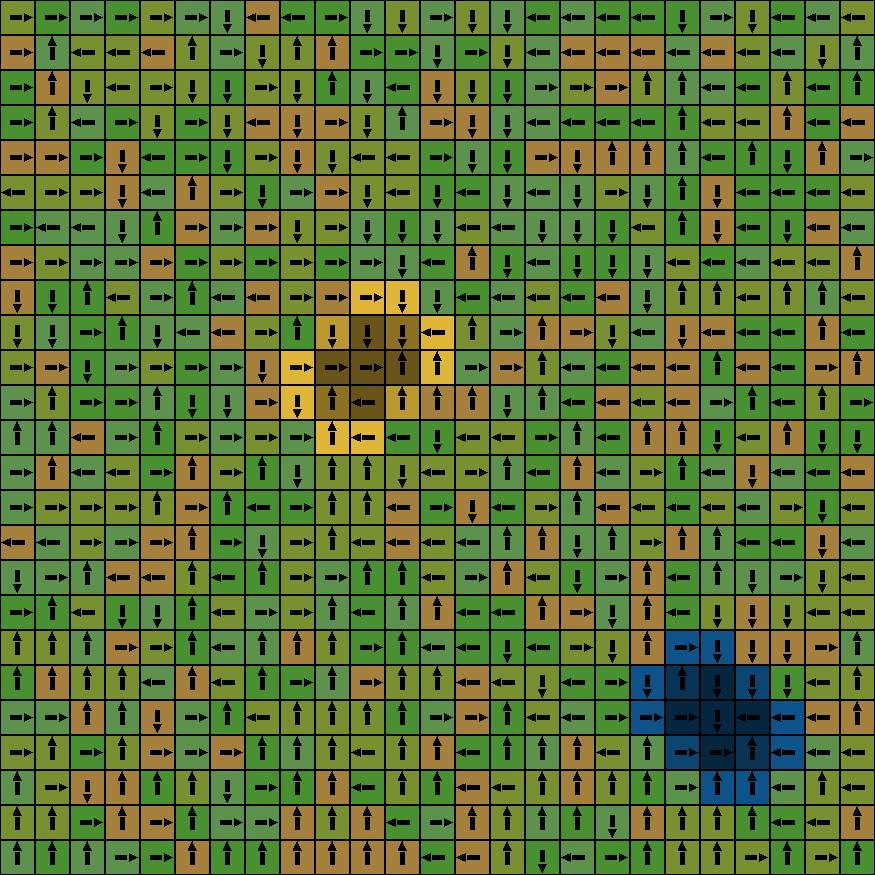

In [25]:
# optimal policy
display(Image(filename=image_filename))

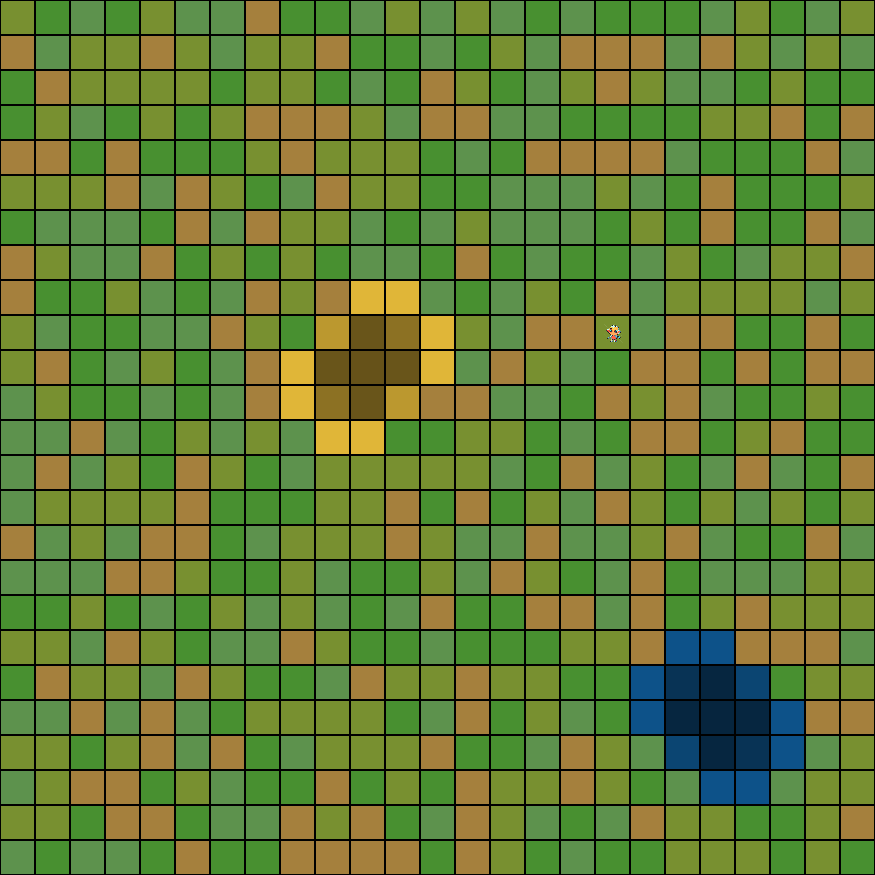

In [26]:
# gameplay showing optimal policy
display(Image(filename=gif_filename))

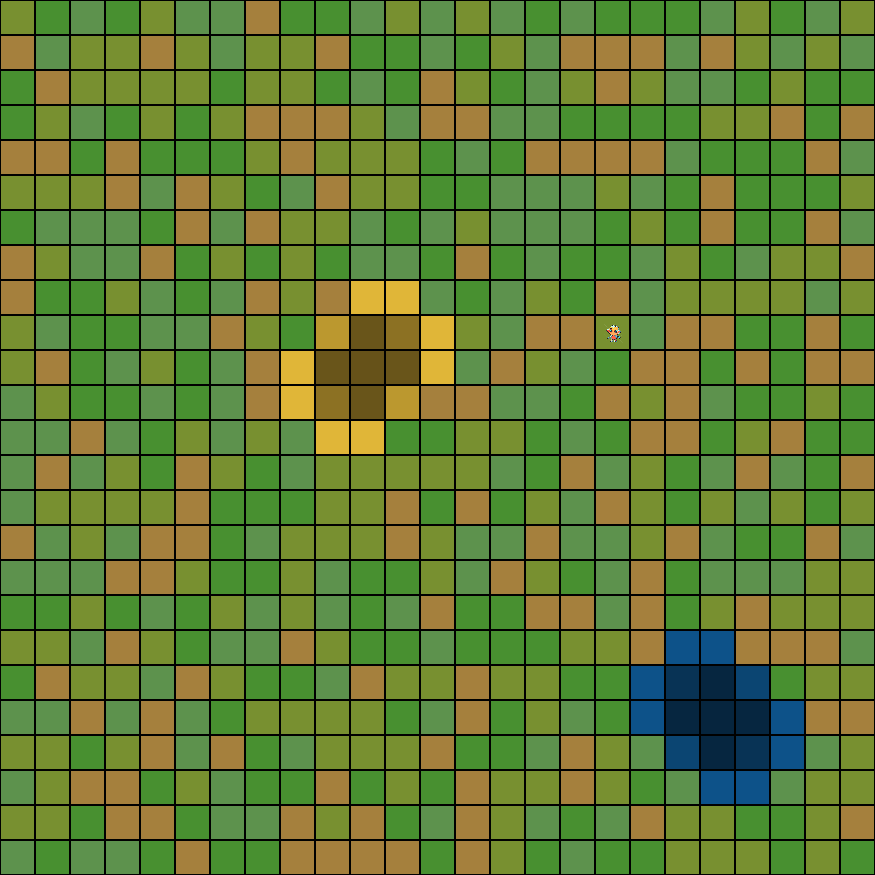

### Temporal Difference

In [38]:
# define output paths
image_filename = os.path.join("./outputs", "optim_policy_geosearch_td.png")
gif_filename = os.path.join("./outputs", "gameplay_geosearch_td.gif")
convergence_plot_filename = os.path.join("./outputs", "convergence_plot_geosearch_td.png")

Training Temporal Difference algorithm for 5000 episodes...
Episode 1/5000 - Average Return: 0.00, Average Q-Value Update: 0.0000
Episode 501/5000 - Average Return: 0.30, Average Q-Value Update: 0.0008
Episode 1001/5000 - Average Return: 0.87, Average Q-Value Update: 0.0033
Episode 1501/5000 - Average Return: 0.96, Average Q-Value Update: 0.0019
Episode 2001/5000 - Average Return: 0.94, Average Q-Value Update: 0.0008
Episode 2501/5000 - Average Return: 0.94, Average Q-Value Update: 0.0008
Episode 3001/5000 - Average Return: 0.98, Average Q-Value Update: 0.0009
Episode 3501/5000 - Average Return: 0.95, Average Q-Value Update: 0.0007
Episode 4001/5000 - Average Return: 0.96, Average Q-Value Update: 0.0006
Episode 4501/5000 - Average Return: 0.98, Average Q-Value Update: 0.0004
Training complete! Action distribution across episodes: [0.33762162 0.31572432 0.17523784 0.17141622]
Final Action Values (Q):
 [[9.30551917e-60 5.07196190e-04 2.66878815e-60 1.64409324e-18]
 [9.61945092e-07 0.0000

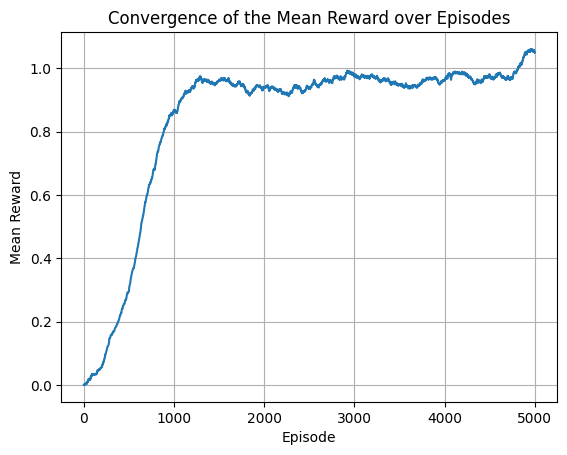

In [39]:
# initialize solver
solver = TemporalDifference(env)

# set parameters
episodes = 5000
max_steps = 37

train_and_visualize_policy(env, solver, episodes, max_steps, verbose, save_metrics, gif_filename, image_filename, convergence_plot_filename)

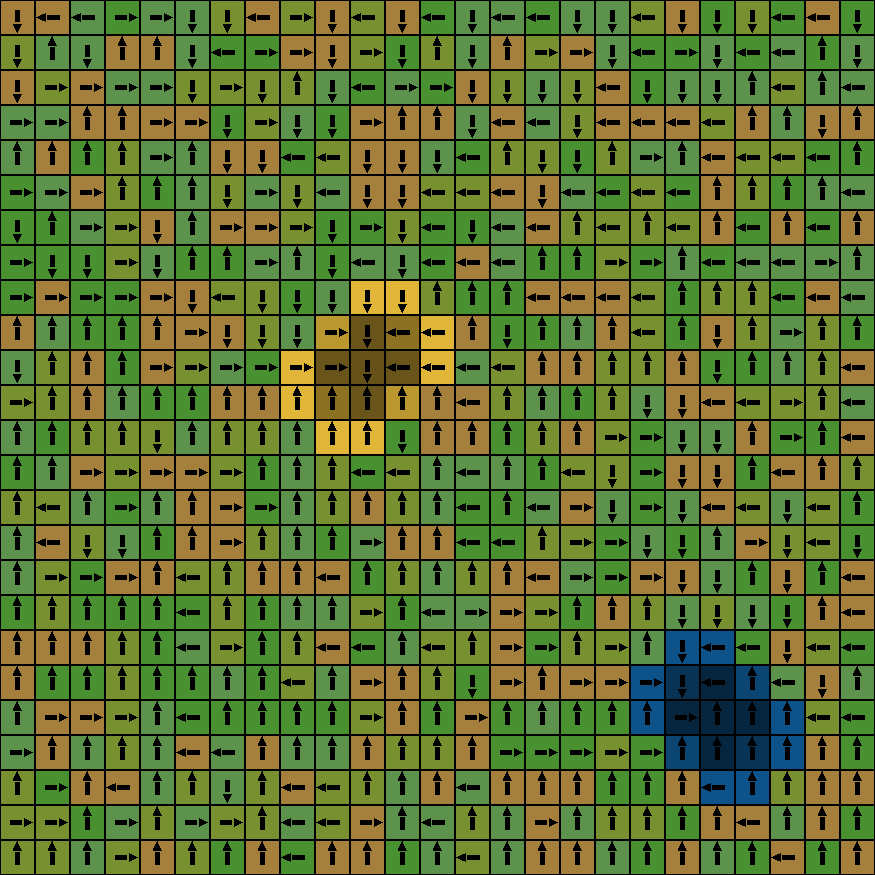

In [40]:
# optimal policy
display(Image(filename=image_filename))

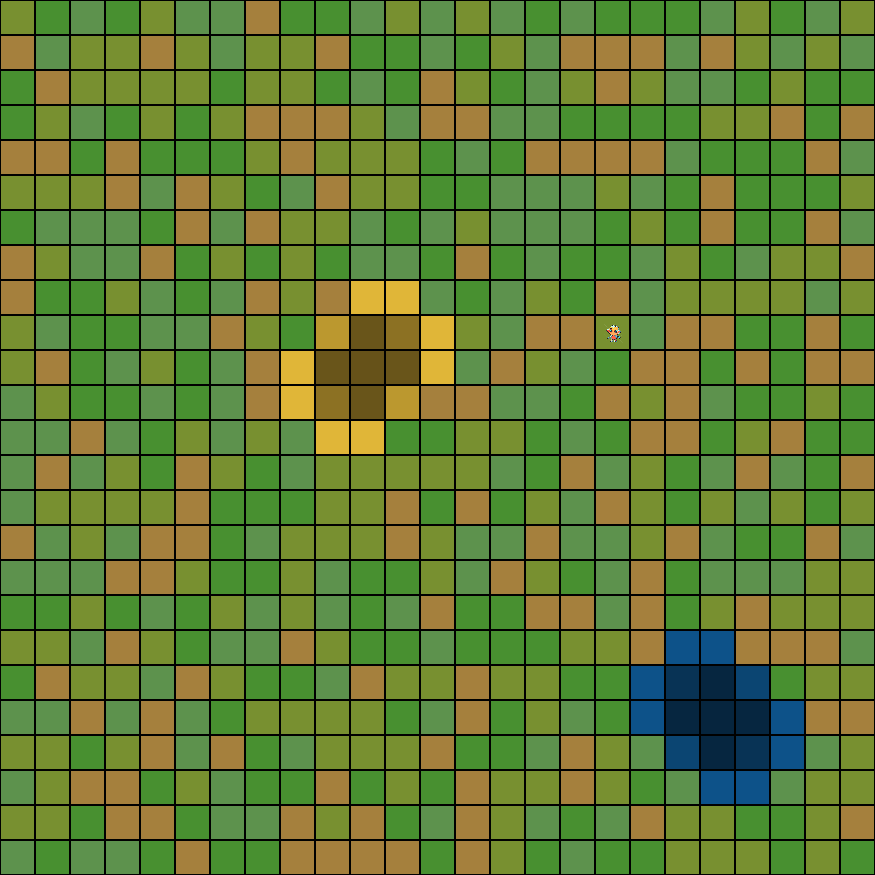

In [27]:
# gameplay showing optimal policy
display(Image(filename=gif_filename))

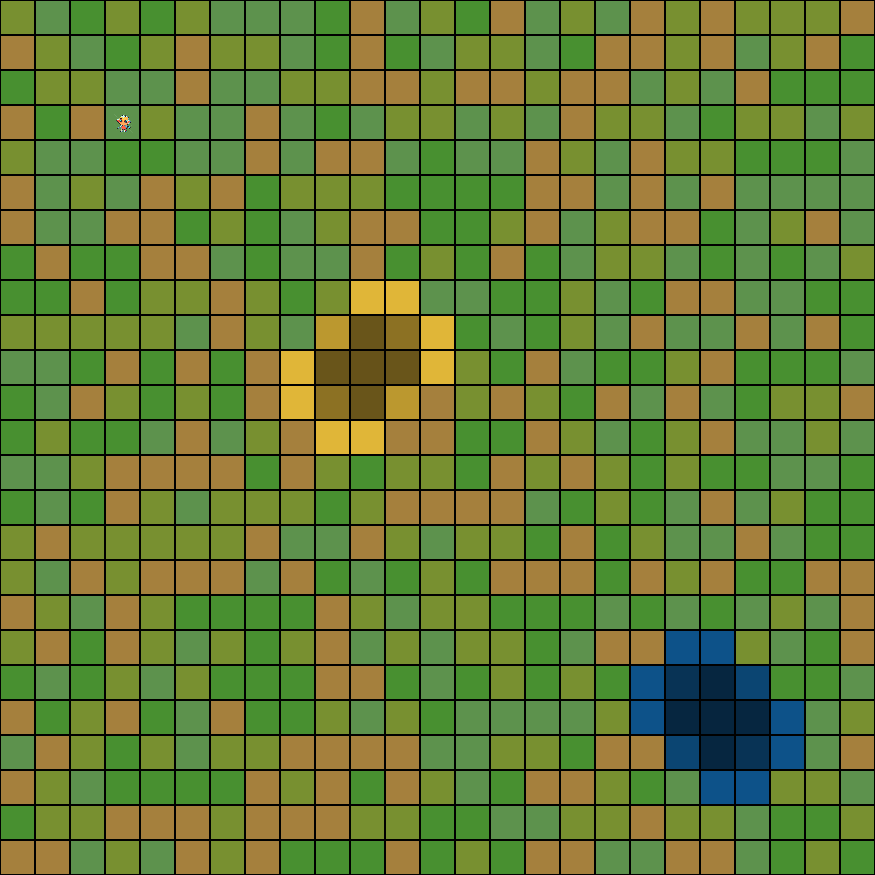

# Conclusion

As you can see, each solver works correctly on each environment! Please check out the code on our GitHub repository [here](https://github.com/kanghengliu/Tabula).